# Linear Algebra Review and Polynomial Curve Fitting Example


In [15]:
#Import needed python libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import math 
import textwrap

[ 0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095
  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185  0.195
  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285  0.295
  0.305  0.315  0.325  0.335  0.345  0.355  0.365  0.375  0.385  0.395
  0.405  0.415  0.425  0.435  0.445  0.455  0.465  0.475  0.485  0.495
  0.505  0.515  0.525  0.535  0.545  0.555  0.565  0.575  0.585  0.595
  0.605  0.615  0.625  0.635  0.645  0.655  0.665  0.675  0.685  0.695
  0.705  0.715  0.725  0.735  0.745  0.755  0.765  0.775  0.785  0.795
  0.805  0.815  0.825  0.835  0.845  0.855  0.865  0.875  0.885  0.895
  0.905  0.915  0.925  0.935  0.945  0.955  0.965  0.975  0.985  0.995]
[-0.02902047  0.05035528 -0.06983162 -0.17199592  0.12159818  0.12076093
  0.05697366  0.08370574  0.10205127 -0.07270377  0.03360013 -0.23113105
  0.15239925 -0.15330768 -0.0130281   0.00529887  0.17763537  0.25124687
 -0.10831983 -0.04628119  0.00133563 -0.05476791 -0.2057528  -0.037943

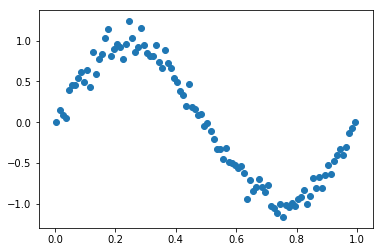

In [38]:
#First, lets generate some simulated data.  Suppose the true function is a sine curve. 
u = 1
l = 0
N = 100
gVar = .1
step = (u-l)/(N)
x = np.arange(l+step/2,u+step/2,step)
e = np.random.normal(0,gVar,N)
t = np.sin(2*math.pi*x) + e

print(x)
# print(x.shape)
print(e)
print(t)

plt.scatter(x,t)


In [41]:
#Then we can fit the data using the polynomial curve fitting method we derived

M = 5
X = np.array([x**m for m in range(M+1)]).T
print(X)

w = np.linalg.inv(X.T@X)@X.T@t
print(w)

[[  1.00000000e+00   5.00000000e-03   2.50000000e-05   1.25000000e-07
    6.25000000e-10   3.12500000e-12]
 [  1.00000000e+00   1.50000000e-02   2.25000000e-04   3.37500000e-06
    5.06250000e-08   7.59375000e-10]
 [  1.00000000e+00   2.50000000e-02   6.25000000e-04   1.56250000e-05
    3.90625000e-07   9.76562500e-09]
 [  1.00000000e+00   3.50000000e-02   1.22500000e-03   4.28750000e-05
    1.50062500e-06   5.25218750e-08]
 [  1.00000000e+00   4.50000000e-02   2.02500000e-03   9.11250000e-05
    4.10062500e-06   1.84528125e-07]
 [  1.00000000e+00   5.50000000e-02   3.02500000e-03   1.66375000e-04
    9.15062500e-06   5.03284375e-07]
 [  1.00000000e+00   6.50000000e-02   4.22500000e-03   2.74625000e-04
    1.78506250e-05   1.16029062e-06]
 [  1.00000000e+00   7.50000000e-02   5.62500000e-03   4.21875000e-04
    3.16406250e-05   2.37304687e-06]
 [  1.00000000e+00   8.50000000e-02   7.22500000e-03   6.14125000e-04
    5.22006250e-05   4.43705312e-06]
 [  1.00000000e+00   9.50000000e-02  

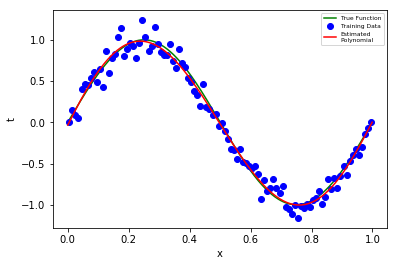

In [42]:
#Now let us use the weights in test

xrange = np.arange(l,u,0.001)  #get equally spaced points in the xrange
y = np.sin(2*math.pi*xrange) #compute the true function value
X = np.array([xrange**m for m in range(w.size)]).T
esty = X@w #compute the predicted value

#plot everything
p1 = plt.plot(xrange, y, 'g') #plot true value
p2 = plt.plot(x, t, 'bo') #plot training data
p3 = plt.plot(xrange, esty, 'r') #plot estimated value

#add legend and axes labels
plt.ylabel('t') #label x and y axes
plt.xlabel('x')
plt.rcParams["axes.titlesize"] = 10
plt.legend((p1[0],p2[0],p3[0]),('True Function', 'Training Data', 'Estimated\nPolynomial'), fontsize=6)


    
    

# Beer Foam Data Set

We can repeat with another data set. (Obtained from: http://www.stat.ufl.edu/~winner/datasets.html) 

Source: A. Leike (2002). "Demonstration of the Exponential Decay Law Using Beer Froth," European Journal of Physics, Vol. 23, #1, pp. 21-26

Description: Measurements of wet foam height and beer height at various time points for 3 brands of beer. Author fits exponential decay model: $H(t) = H(0)e^{-\lambda t}$

Variables/Columns:
<li> Time from pour (seconds)  4-8
<li> Erdinger Weissbier foam height (cm)  10-16
<li> Augustinerbrau Munchen foam height (cm)    18-24
<li> Budweiser foam height (cm)    26-32



In [5]:
#Load Data
beerData = np.loadtxt('beer_foam.dat.txt')

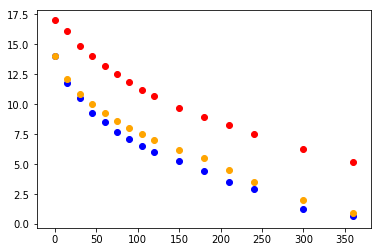

In [6]:
plt.scatter(beerData[:,0], beerData[:,1], color = "red")
plt.scatter(beerData[:,0], beerData[:,2], color = "blue")
plt.scatter(beerData[:,0], beerData[:,3], color = "orange")

In [7]:
beerData

array([[   0. ,   17. ,   14. ,   14. ],
       [  15. ,   16.1,   11.8,   12.1],
       [  30. ,   14.9,   10.5,   10.9],
       [  45. ,   14. ,    9.3,   10. ],
       [  60. ,   13.2,    8.5,    9.3],
       [  75. ,   12.5,    7.7,    8.6],
       [  90. ,   11.9,    7.1,    8. ],
       [ 105. ,   11.2,    6.5,    7.5],
       [ 120. ,   10.7,    6. ,    7. ],
       [ 150. ,    9.7,    5.3,    6.2],
       [ 180. ,    8.9,    4.4,    5.5],
       [ 210. ,    8.3,    3.5,    4.5],
       [ 240. ,    7.5,    2.9,    3.5],
       [ 300. ,    6.3,    1.3,    2. ],
       [ 360. ,    5.2,    0.7,    0.9]])

In [8]:
#Then we can fit the data using the polynomial curve fitting method we derived

M = 2
x = beerData[:,0]
t = beerData[:,1]
X = np.array([x**m for m in range(M+1)]).T

# print(X)

w = np.linalg.inv(X.T@X)@X.T@t

print(w)


[  1.65859872e+01  -5.63213033e-02   7.13725954e-05]


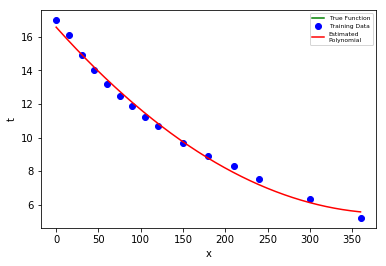

In [9]:
#Now let us use the weights in test

xrange = np.arange(beerData[0,0],beerData[beerData.shape[0]-1,0],0.001)  #get equally spaced points in the xrange
X = np.array([xrange**m for m in range(w.size)]).T
esty = X@w #compute the predicted value

#plot everything
p2 = plt.plot(x, t, 'bo') #plot training data
p3 = plt.plot(xrange, esty, 'r') #plot estimated value

#add legend and axes labels
plt.ylabel('t') #label x and y axes
plt.xlabel('x')
plt.rcParams["axes.titlesize"] = 10
plt.legend((p1[0],p2[0],p3[0]),('True Function', 'Training Data', 'Estimated\nPolynomial'), fontsize=6)


In [10]:
#What will the foam height be at t = 430? 
t = 430
x_test = np.array([t**m for m in range(w.size)]).T
print(x_test)
predicted_height = x_test@w
print(predicted_height)

[     1    430 184900]
5.56461965989
